El objetivo de esta práctica como funciona el FA en R con un conjunto de datos, en este caso housing.data, que contiene 14 variables de 504 casas del entorno de Boston.
Las columnas de houses tienen el siguiente significado:
### Descripción de Variables:

1. **CRIM**: Tasa de crimen per cápita por zona.
2. **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
3. **INDUS**: Proporción de acres de negocios no minoristas por zona.
4. **CHAS**: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 en caso contrario).
5. **NOX**: Concentración de óxido nítrico (partes por 10 millones).
6. **RM**: Número promedio de habitaciones por vivienda.
7. **AGE**: Proporción de unidades ocupadas por el propietario construidas antes de 1940.
8. **DIS**: Distancias ponderadas a cinco centros de empleo en Boston.
9. **RAD**: Índice de accesibilidad a carreteras radiales.
10. **TAX**: Tasa de impuestos a la propiedad de valor completo por cada $10,000.
11. **PTRATIO**: Proporción alumno-maestro por zona.
12. **B**: 1000(Bk — 0.63)², donde Bk es la proporción de [personas de ascendencia afroamericana] por zona.
13. **LSTAT**: Porcentaje de población de bajo estatus.
14. **MEDV**: Valor mediano de viviendas ocupadas por el propietario en miles de dólares.

Donde la variable a predecir va a ser MEDV, es decir, el precio de la vivienda según las características de la zona en que se encuentra

Trabajar con tantas variables a la hora de aplicar cualquier algoritmo es complicado y, lo que es más, si las variables
están correladas. Además, se hace más compleja su interpretación. Por ello, vamos a aplicar FA para determinar si hay un
conjunto más reducido de factores que expliquen la variación de los datos. Para ello usaremos la función fa de R. A
continuación se adjunta el código comentado.

In [1]:
!pip install factor-analyzer #necesito instalar factor-analyzer en Colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 753.5 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=cf240d89bf0b406a2702c062c466b1740ce2c1a15e58f3138337fb07df81b8a4
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [ ]:
#cargar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Cargar los datos desde la URL
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
houses = pd.read_csv(url, delim_whitespace=True, names=names, na_values='?')
print(houses.info())

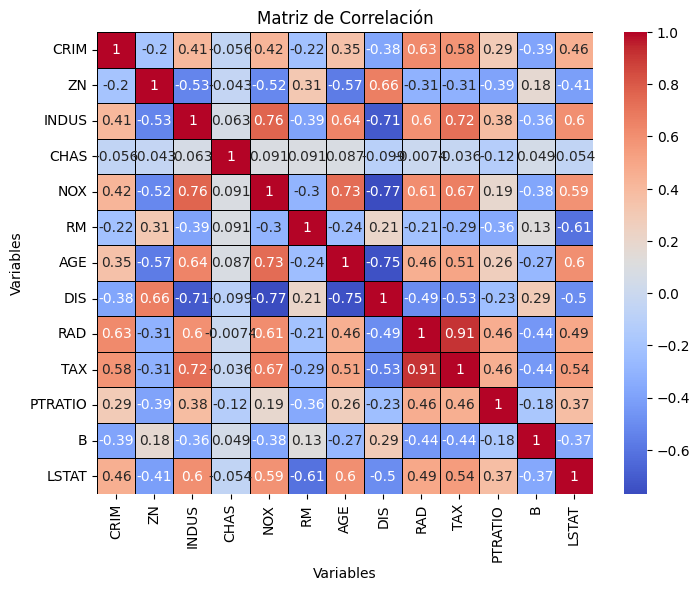

In [ ]:
# Eliminar la columna 'MEDV' para el análisis factorial exploratorio (EFA)
houses.drop(columns=['MEDV'], inplace=True)

# Verificar y manejar los valores faltantes si es necesario
houses.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Calcular la matriz de correlación
cor_mat = houses.corr()

# Dibujar el mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cor_mat, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

# Personalizar etiquetas de los ejes y título
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el mapa de calor
plt.show()

Puede observarse que algunas variables tienen correlaciones significativas, por ejemplo DIS con INDUS, NOX y AGE, esto es: la distancia a lugares de empleo en la zona es inversamente proporcional a la concentación de ácido nítrico, la proporción de acres de negocios no minoristas y el número de viviendas anteriores a 1940. Esto es, las viviendas más nuevas se han construido en zonas más industriales con peor calidad de aire.

A continuación, comprobemos si los datos son apropiados para análisis FA usando pruebas de esfericidad de Bartlett y Kaiser-Meyer-Olkin (KMO).

El test de esfericidad evalua la hipótesis nula de que la matriz de correlación es una matrix de identidad, esto es, las variables son independientes unas de otras y, por tanto, no apropiadas para FA. Un valor Chi-Square alto (esto es, p-value bajo) indicaría que la hipótesis nula no es cierta.

Por otro lado KMO efectúa la comparación de las correlaciones entre variables con correlaciones parciales. El objetivo de una correlación parcial es determinar si la correlación de dos variables se debe al efecto de otras, que están "contaminando" el resultado. Cuanto más alto el valor resultante, más adecuados los datos para FA. Idealmente, necesitamos un KMO superior a 0.7.

In [ ]:
# Calcular la esfericidad de Bartlett y el valor KMO
bartlett_test_value, bartlett_test_p_value = calculate_bartlett_sphericity(houses)
kmo_per_variable, kmo_total = calculate_kmo(houses)

print("Bartlett's Test of Sphericity:")
print(f"Chi-Square value: {bartlett_test_value:.4f}")
print(f"P-value: {bartlett_test_p_value:.4f}")

print("\nKaiser-Meyer-Olkin (KMO) Test:")
print(f"KMO per variable: {kmo_per_variable}")
print(f"KMO overall: {kmo_total:.4f}")

Bartlett's Test of Sphericity:
Chi-Square value: 4461.6396
P-value: 0.0000

Kaiser-Meyer-Olkin (KMO) Test:
KMO per variable: [0.9312354  0.84010789 0.8918402  0.51936355 0.90484276 0.71522147
 0.89582573 0.88560516 0.78288346 0.79909036 0.80220142 0.9444298
 0.85965949]
KMO overall: 0.8535


En tanto que ambas métricas indican que el FA es apropiado para este conjunto de datos, procedemos a calcularlo.

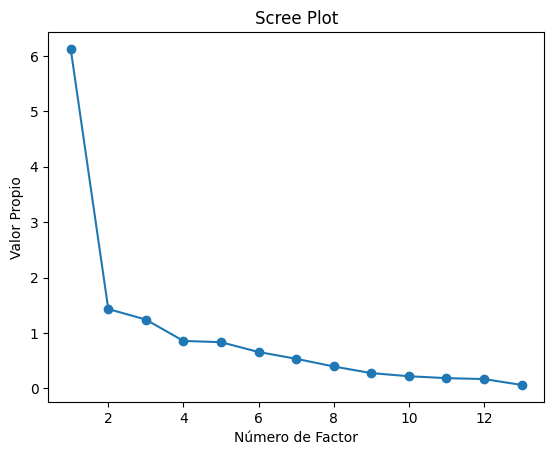

Porcentaje de varianza acumulada explicada por número de factor:
[0.20623999 0.30181747 0.3935192  0.47065005 0.53652849 0.58795741
 0.63315624 0.67459996 0.69781716 0.71904621]


In [ ]:
fa = FactorAnalyzer(n_factors=10)
fa.fit(scaled_data)

# Obtener los valores propios y graficar el Scree plot
ev, v = fa.get_eigenvalues()
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de Factor')
plt.ylabel('Valor Propio')
plt.show()

# Obtener la varianza explicada por cada factor y calcular el porcentaje acumulado
total_variance, unique_variance, explained_variance_ratio = fa.get_factor_variance()

print("Porcentaje de varianza acumulada explicada por número de factor:")
print(explained_variance_ratio)

Solo 3 eigenvalores son superiores a 1, pero como solo explicarían el 39% de la varianza, subiremos a 4.

In [ ]:
from sklearn.preprocessing import StandardScaler
#efa = FactorAnalyzer(n_factors=3, rotation='oblimin', method='minres')
#efa.fit(cor_mat)
#escalo los datos antes del análisis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(houses)

n_factors=4
fa = FactorAnalyzer(n_factors)
fa.fit(scaled_data)

# Obtener los resultados del EFA
loadings = fa.loadings_
communality = fa.get_communalities()
factor_variance = fa.get_factor_variance()

# Imprimir los resultados
print("\nFactor Loadings:")
print(loadings)

print("\nCommunalities:")
print(communality)

print("\nFactor Variance:")
print(factor_variance)


Factor Loadings:
[[ 0.64161684 -0.03781429  0.05473798  0.01231514]
 [ 0.24447718 -0.82788491 -0.05100058 -0.36625095]
 [ 0.31631107  0.52638309  0.14875409  0.07491287]
 [-0.04397373  0.20119125 -0.11508215 -0.11397963]
 [ 0.36968696  0.58421518  0.14247527 -0.19324066]
 [ 0.15174565 -0.05877614 -0.71445104 -0.10361288]
 [ 0.09481282  0.69530099  0.16277575 -0.04132112]
 [-0.11908763 -0.86877973  0.04600889 -0.02627417]
 [ 1.01707825  0.02376447 -0.26293778  0.21329713]
 [ 0.92598113  0.07404023 -0.11832602  0.15433474]
 [ 0.154187    0.16588193 -0.01712606  0.74889636]
 [-0.48823967  0.00319627 -0.06384856  0.0659065 ]
 [ 0.11595082  0.14314624  0.86050574 -0.14564735]]

Communalities:
[0.41625    0.88190333 0.40487157 0.06864687 0.53561698 0.54765729
 0.52063632 0.77176724 1.14964486 0.90074327 0.61242951 0.24680849
 0.79561872]

Factor Variance:
(array([2.9237796 , 2.64142871, 1.42829863, 0.85908752]), array([0.22490612, 0.20318682, 0.10986913, 0.06608366]), array([0.22490612, 0.4

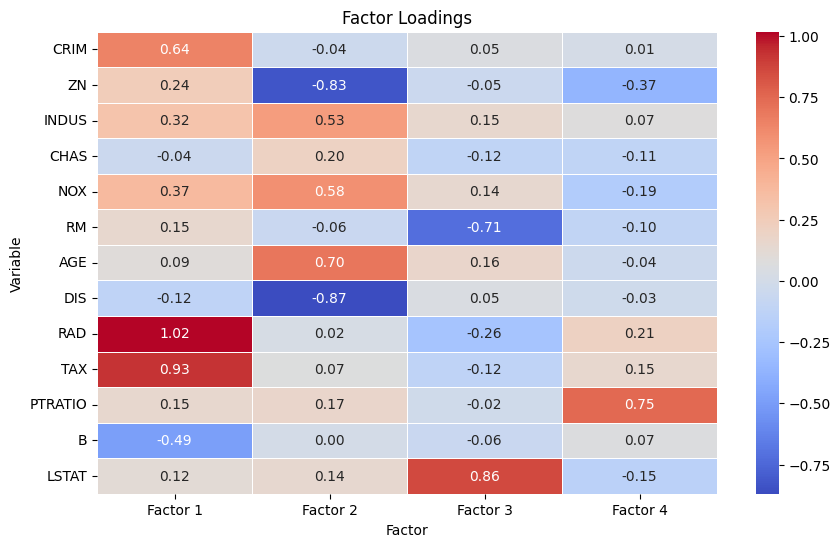

In [ ]:
# Obtener los loadings de los primeros n_factors
loadings_df = pd.DataFrame(loadings, index=houses.columns)
loadings_df.columns = [f'Factor {i+1}' for i in range(n_factors)]

# Graficar los loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Factor Loadings')
plt.xlabel('Factor')
plt.ylabel('Variable')
plt.show()

En principio, podríamos quedarnos únicamente con las variables con un peso mayor o igual a 0.7 en el factor correspondiente, esto es:


*   F1 sube sobre todo con RAD y TAX, esto es accesibilidad a transporte e impuestos en la zona
*   F2 varía en negativo con ZN, DIS y en positivo con AGE o, lo que es lo mismo, sube edad del inmueble y baja con la proporción de terreno para viviendas y la distancia a áreas de empleo
*  F3 suve con LSTAT t baja con RM, esto es baja con % de población de bajo estatus y sube con el número de habitaciones por vivienda.
*  F4 depende sobre todo del ratio profesor/alumno de la zona

En resumen, el precio de la vivienda parece definirse principalmente con lo accesible que sea la vivienda, que sea o no zona centro, el tamaño de la misma, que varía con lo bueno que sea el vecindario y la calidad de la educación en la zona. No resulta sorprendente, pero valida nuestras suposiciones.


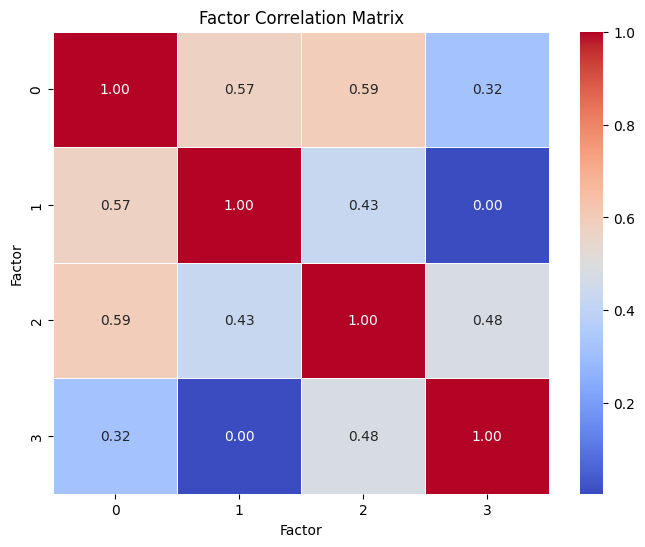

In [ ]:
# Obtener la matriz de correlación entre factores
factor_corr = np.corrcoef(fa.transform(scaled_data).T)

# Graficar la matriz de correlación entre factores
plt.figure(figsize=(8, 6))
sns.heatmap(factor_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Factor Correlation Matrix')
plt.xlabel('Factor')
plt.ylabel('Factor')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

En principio, la correlación entre factores no es excesiva -idealmente debería ser muy baja-, aunque es un poco alta en algunos casis, como F1/F2 o F1/F3. La menos correlada con el resto es F4, que tiene que ver sobre todo con el ratio profesor/alumno.

Nótese que el FA no suele usarse como paso previo a la predicción, sino para identificar factores latentes que expliquen relaciones subyacentes. Por ejemplo, aunque habría que comprobarlo explícitamente, podría pensarse observando F2 que en la zona de Boston los edificios más antiguos se encuentran en zonas menos densamente pobladas, pero cerca de zonas de empleo, lo que, en función del tipo de empleo de la zona, podría indicar que hay zonas residenciales unifamiliares muy cerca de las zonas industriales o que hay centros de empleo importantes cercanos a las zonas más ricas del centro.